In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import wordcloud as word_cloud
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import tree
import graphviz as graphic
from subprocess import call
from IPython.display import Image
from sklearn.tree import export_graphviz
from pandas.plotting import scatter_matrix
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")


    

df_cha = pd.read_csv('HPCharactersData.csv')
df_cha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          1281 non-null   object
 1   Link          1281 non-null   object
 2   Descr         1153 non-null   object
 3   Gender        1185 non-null   object
 4   Species/Race  1281 non-null   object
 5   Blood         1281 non-null   object
 6   School        1281 non-null   object
 7   Profession    1281 non-null   object
dtypes: object(8)
memory usage: 80.2+ KB


In [4]:
df_cha

Name  \
0                  Mrs. Abbott   
1                Hannah Abbott   
2                Abel Treetops   
3             Euan Abercrombie   
4         Aberforth Dumbledore   
...                        ...   
1276                Yusuf Kama   
1277                    Yvonne   
1278  Zacharias Smith's father   
1279                    Zograf   
1280                     Zonko   

                                                   Link  \
0     https://www.hp-lexicon.org/character/abbott-fa...   
1     https://www.hp-lexicon.org/character/abbott-fa...   
2     https://www.hp-lexicon.org/character/abel-tree...   
3     https://www.hp-lexicon.org/character/abercromb...   
4     https://www.hp-lexicon.org/character/dumbledor...   
...                                                 ...   
1276   https://www.hp-lexicon.org/character/yusef-kama/   
1277       https://www.hp-lexicon.org/character/yvonne/   
1278  https://www.hp-lexicon.org/character/zacharias...   
1279       https://www.hp-lexicon.org/character/zograf/   
1280        https://www.hp-lexicon.org/character/zonko/   

                                                  Descr  Gender Species/Race  \
0     Mrs. Abbott was the mother of Hannah Abbott, a...  Female        witch   
1     Hannah Abbott is a Hufflepuff student in Harry...  Female        witch   
2     Abel Treetops was a wizard from Cincinnati who...    Male       wizard   
3     Euan Abercrombie was a small boy with prominen...    Male       wizard   
4     Aberforth Dumbledore was a tall, thin, grumpy-...    Male       wizard   
...                                                 ...     ...          ...   
1276  Yusuf Kama was a French wizard of Senegalese a...    Male        human   
1277  Yvonne was a friend of Petunia Dursley who was...  Female       muggle   
1278  The father of Hogwarts student Zacharias Smith...    Male       wizard   
1279  Zograf played Keeper for the Bulgarian Nationa...     NaN       wizard   
1280  Founder(?) of Zonko’s Joke Shop. Possibly a re...     NaN      unknown   

            Blood                 School                      Profession  
0     Muggle-born                Unknown                         Unknown  
1      Half-blood  Hogwarts - Hufflepuff  Landlady of the Leaky Cauldron  
2         Unknown                Unknown                         Unknown  
3         Unknown  Hogwarts - Gryffindor                         Unknown  
4      Half-blood     Hogwarts - Student                          Barman  
...           ...                    ...                             ...  
1276   Pure blood                Unknown                         Unknown  
1277       Muggle                Unknown                         Unknown  
1278      Unknown                Unknown                         Unknown  
1279      Unknown                Unknown       Quidditch player (Keeper)  
1280      Unknown                Unknown                         Unknown  

[1281 rows x 8 columns]

  City  Number
0    M     395
1    F     790
2  NaN      96


<AxesSubplot: ylabel='Number'>

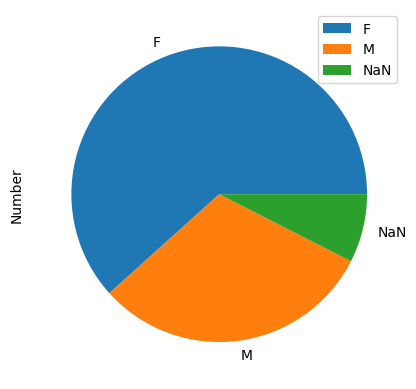

In [5]:
df_male= df_cha[df_cha['Gender']=='Female']
df_female= df_cha[df_cha['Gender']=='Male']
df_nan= df_cha[(df_cha['Gender']!='Female') & (df_cha['Gender']!='Male')]

data = [['M', len(df_male)], ['F', len(df_female)], ['NaN', len(df_nan)]]
df = pd.DataFrame(data, columns=['City', 'Number'])
print(df)
df.groupby(['City']).sum().plot(kind='pie', y='Number')

         Class  Number
0      Unknown    1029
1   Pure blood     124
2       Muggle      69
3   Half-blood      43
4  Muggle-born      16


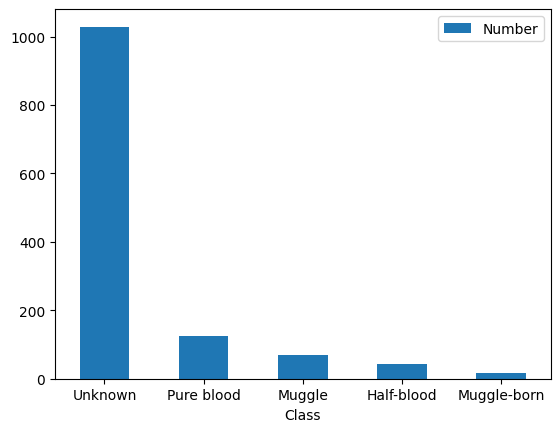

In [6]:
df_unk= df_cha[df_cha['Blood']=='Unknown']
df_pureBlood= df_cha[df_cha['Blood']=='Pure blood']
df_muggle= df_cha[df_cha['Blood']=='Muggle']
df_halfBlood= df_cha[df_cha['Blood']=='Half-blood']
df_muggleBorn= df_cha[df_cha['Blood']=='Muggle-born']

data = [['Unknown', len(df_unk)], ['Pure blood', len(df_pureBlood)], ['Muggle', len(df_muggle)], ['Half-blood', len(df_halfBlood)], ['Muggle-born', len(df_muggleBorn)]]
df = pd.DataFrame(data, columns=['Class', 'Number'])
print(df)
ax = df.plot.bar(x='Class', y='Number', rot=0)

In [7]:
df_spec=df_cha['Species/Race'].value_counts()



In [8]:
df_dropped = df_cha.drop(['Name','Link','Descr','School'],axis=1)
df_dropped

Gender Species/Race        Blood                      Profession
0     Female        witch  Muggle-born                         Unknown
1     Female        witch   Half-blood  Landlady of the Leaky Cauldron
2       Male       wizard      Unknown                         Unknown
3       Male       wizard      Unknown                         Unknown
4       Male       wizard   Half-blood                          Barman
...      ...          ...          ...                             ...
1276    Male        human   Pure blood                         Unknown
1277  Female       muggle       Muggle                         Unknown
1278    Male       wizard      Unknown                         Unknown
1279     NaN       wizard      Unknown       Quidditch player (Keeper)
1280     NaN      unknown      Unknown                         Unknown

[1281 rows x 4 columns]

Which subspecies do the characters classified in movies/books?

There are different ways to classify the characters.

        Class  Number
0     Species      72
1      Gender       2
2       Blood       5
3      School      22
4  Profession     358


<AxesSubplot: ylabel='Number'>

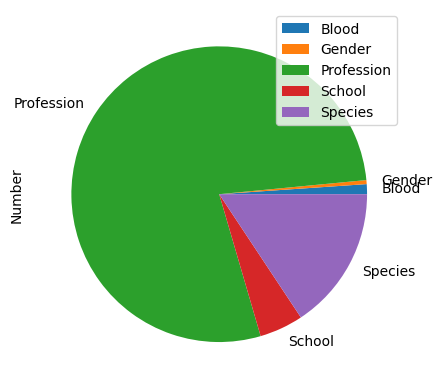

In [11]:
df_spec=df_cha['Species/Race'].value_counts()
df_gender = df_cha['Gender'].value_counts()
df_blood = df_cha['Blood'].value_counts()
df_school= df_cha['School'].value_counts()
df_profession = df_cha['Profession'].value_counts()

data = [['Species', len(df_spec)], ['Gender', len(df_gender)], ['Blood', len(df_blood)], ['School', len(df_school)], ['Profession', len(df_profession)]]
data2 = [len(df_spec), len(df_gender),len(df_blood), len(df_school),len(df_profession)]
df = pd.DataFrame(data, columns=['Class', 'Number'])
print(df)
df.groupby(['Class']).sum().plot(kind='pie', y='Number')
